In [81]:
%matplotlib inline
import numpy as np
import pandas as pd
from pathlib import Path
import random as rnd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [82]:
#Read crypto_data.csv into Pandas. The dataset was obtained from CryptoCompare.
crypto = pd.read_csv(Path('crypto_data.csv'))
crypto_df = pd.DataFrame(crypto)

In [83]:
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1252 non-null   object 
 1   CoinName         1252 non-null   object 
 2   Algorithm        1252 non-null   object 
 3   IsTrading        1252 non-null   bool   
 4   ProofType        1252 non-null   object 
 5   TotalCoinsMined  744 non-null    float64
 6   TotalCoinSupply  1252 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 60.0+ KB


In [84]:
crypto4 = crypto_df
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [85]:
#Discard all cryptocurrencies that are not being traded.
crypto_df = crypto_df.query('IsTrading == True')

In [86]:
#Once you have done this, drop the IsTrading column from the dataframe.
crypto_df = crypto_df.drop(["IsTrading"], axis = 1)

In [87]:
#Remove all rows that have at least one null value.
crypto_df = crypto_df.dropna()

In [88]:
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [89]:
#Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero.
crypto_df = crypto_df.query("TotalCoinsMined != 0")

In [90]:
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [91]:
#In order for your dataset to be comprehensible to a machine learning algorithm, its data should be numeric. 
#Since the coin names do not contribute to the analysis of the data, delete the CoinName from the original dataframe.
crypto_df = crypto_df.drop(["CoinName"], axis=1)

In [92]:
crypto_df.head()

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0


In [93]:
#Change the column "Unnamed: 0" to "CoinCode"
crypto_df = crypto_df.rename(columns = {"Unnamed: 0": "CoinCode"})
crypto_df.head()

,CoinCode,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0


In [94]:
#The line below is a test run to see if rename some of the messy data. PoS/PoW and PoW/PoS are the same, so I relabeled them
#so that they would be categorized together.
crypto_df_clean = crypto_df.replace({"ProofType" : {"PoS/PoW":"PoW/PoS"}})

crypto_df_clean["ProofType"].unique()

array(['PoW/PoS', 'PoW', 'PoS', 'PoC', 'PoS/PoW/PoT', 'PoST', 'PoW/nPoS',
       'dPoW/PoW', 'PoW/PoW', 'DPoS', 'TPoS', 'PoW/PoS ',
       'Proof of Authority', 'PoW and PoS', 'POBh', 'PoW + Hive', 'PoA',
       'HPoW', 'Zero-Knowledge Proof', 'DPOS', 'Pos', 'Proof of Trust',
       'DPoC', 'LPoS', 'PoS/LPoS'], dtype=object)

In [95]:
#Here I renamed the categories for consistency. 

crypto_df_clean = crypto_df.replace({"ProofType" : {"Pos":"PoS", "PoW and PoS": "PoS/PoW", "PoW/PoS ":"PoW/PoS"}})

crypto_df_clean = crypto_df_clean.replace({"ProofType" : {"Proof of Authority":"PoA",
                                                   "PoW/PoS":"PoS/PoW", 
                                                    "DPOS":"DPoS", 
                                                    "PoW + Hive": "HPoW", 
                                                    "PoW/PoW": "PoW",
                                                   "TPoS": "PoST", 
                                                    "Proof of Trust":"PoT"}})

crypto_df_clean.sort_values(["ProofType"], ascending=True).groupby(["ProofType"]).count()

,CoinCode,Algorithm,TotalCoinsMined,TotalCoinSupply
ProofType,,,,
DPoC,1,1,1,1
DPoS,10,10,10,10
HPoW,2,2,2,2
LPoS,1,1,1,1
POBh,1,1,1,1
PoA,2,2,2,2
PoC,3,3,3,3
PoS,87,87,87,87
PoS/LPoS,1,1,1,1


In [96]:
#I split the values of each "ProofType" to Value/Value... For example, make "DPoC" = "D/PoC." 
#This will make it easier when splitting them up into two coluns

crypto_df_clean = crypto_df_clean.replace({"ProofType" : {'PoS/T': 'PoST',
                                                          'dPoW/PoW':'d/PoW','POBh':'PoBh',
                                                          'DPoS':'D/PoS','DPoS':'D/PoS'}})



crypto_df_clean[["Deferred","DPoC","HPoW","PoA","LPoS","nPoS","PoBh", "PoC", "PoT", "PoS","PoST", "PoW", "Zero-Knowledge Proof",]] = 0

crypto_df_clean["ProofType"].unique()

array(['PoS/PoW', 'PoW', 'PoS', 'PoC', 'PoS/PoW/PoT', 'PoST', 'PoW/nPoS',
       'd/PoW', 'D/PoS', 'PoA', 'PoBh', 'HPoW', 'Zero-Knowledge Proof',
       'PoT', 'DPoC', 'LPoS', 'PoS/LPoS'], dtype=object)

In [97]:
#I used OneHotCoder and GetDummies to convert the columns into multiple columns of 0s and 1s, but it was sloppy.
#Although I have use GetDummies a little later for Algorithm
#I chose to manually convert the columns these. That way Pos/PoW would get a "1" in the PoS column and "1" in the PoW column.
#All other columns received a zero. 

crypto_df_clean.loc[(crypto_df_clean['ProofType'] == 'PoS/PoW'), 'PoS'] = 1  
crypto_df_clean.loc[(crypto_df_clean['ProofType'] == 'PoS/PoW'), 'PoW'] = 1  
crypto_df_clean.loc[(crypto_df_clean['ProofType'] == 'PoW'), 'PoW'] = 1  
crypto_df_clean.loc[(crypto_df_clean['ProofType'] == 'PoS'), 'PoS'] = 1  
crypto_df_clean.loc[(crypto_df_clean['ProofType'] == 'PoC'), 'PoC'] = 1  
crypto_df_clean.loc[(crypto_df_clean['ProofType'] == 'PoS/PoW/PoT'), 'PoS'] = 1  
crypto_df_clean.loc[(crypto_df_clean['ProofType'] == 'PoS/PoW/PoT'), 'PoW'] = 1  
crypto_df_clean.loc[(crypto_df_clean['ProofType'] == 'PoS/PoW/PoT'), 'PoT'] = 1  
crypto_df_clean.loc[(crypto_df_clean['ProofType'] == 'PoST'), 'PoST'] = 1  
crypto_df_clean.loc[(crypto_df_clean['ProofType'] == 'PoW/nPoS'), 'PoW'] = 1  
crypto_df_clean.loc[(crypto_df_clean['ProofType'] == 'PoW/nPoS'), 'nPoS'] = 1  
crypto_df_clean.loc[(crypto_df_clean['ProofType'] == 'd/PoW/PoW'), 'Deferred'] = 1  
crypto_df_clean.loc[(crypto_df_clean['ProofType'] == 'd/PoW/PoW'), 'PoW'] = 1  
crypto_df_clean.loc[(crypto_df_clean['ProofType'] == 'D/PoS'), 'Deferred'] = 1  
crypto_df_clean.loc[(crypto_df_clean['ProofType'] == 'D/PoS'), 'PoS'] = 1  
crypto_df_clean.loc[(crypto_df_clean['ProofType'] == 'PoA'), 'PoA'] = 1  
crypto_df_clean.loc[(crypto_df_clean['ProofType'] == 'PoBh'), 'PoBh'] = 1  
crypto_df_clean.loc[(crypto_df_clean['ProofType'] == 'HPoW'), 'HPoW'] = 1  
crypto_df_clean.loc[(crypto_df_clean['ProofType'] == 'Zero-Knowledge Proof'), 'Zero-Knowledge Proof'] = 1  
crypto_df_clean.loc[(crypto_df_clean['ProofType'] == 'PoT'), 'PoT'] = 1  
crypto_df_clean.loc[(crypto_df_clean['ProofType'] == 'DPoC'), 'DPoC'] = 1  
crypto_df_clean.loc[(crypto_df_clean['ProofType'] == 'LPoS'), 'LPoS'] = 1  
crypto_df_clean.loc[(crypto_df_clean['ProofType'] == 'PoS/LPoS'), 'LPoS'] = 1  
crypto_df_clean.loc[(crypto_df_clean['ProofType'] == 'PoS/LPoS'), 'PoS'] = 1  


crypto2 = crypto_df_clean

crypto2.columns

Index(['CoinCode', 'Algorithm', 'ProofType', 'TotalCoinsMined',
       'TotalCoinSupply', 'Deferred', 'DPoC', 'HPoW', 'PoA', 'LPoS', 'nPoS',
       'PoBh', 'PoC', 'PoT', 'PoS', 'PoST', 'PoW', 'Zero-Knowledge Proof'],
      dtype='object')

In [110]:
#I checked to ensure every row had at least one "1" in one of these columns.

crypto2[["Total"]] = crypto2['Deferred'] + crypto2['DPoC'] + crypto2['HPoW'] + crypto2['LPoS'] + crypto2['nPoS'] +\
    crypto2['PoBh']+crypto2['PoC'] + crypto2['PoT'] + crypto2['PoS'] + crypto2['PoW'] + crypto2['Zero-Knowledge Proof'] +\
    crypto2['PoST'] + crypto2['PoA']

In [111]:
#crypto2 = crypto2.drop(["ProofType"], axis=1)
crypto2.columns

Index(['CoinCode', 'Algorithm', 'ProofType', 'TotalCoinsMined',
       'TotalCoinSupply', 'Deferred', 'DPoC', 'HPoW', 'PoA', 'LPoS', 'nPoS',
       'PoBh', 'PoC', 'PoT', 'PoS', 'PoST', 'PoW', 'Zero-Knowledge Proof',
       'Total'],
      dtype='object')

In [119]:
crypto5 = pd.get_dummies(data=crypto2, columns=['Algorithm'])
crypto5.columns
crypto3 = crypto5
crypto3.head()

,CoinCode,ProofType,TotalCoinsMined,TotalCoinSupply,Deferred,DPoC,HPoW,PoA,LPoS,nPoS,...,Algorithm_Tribus,Algorithm_VBFT,Algorithm_VeChainThor Authority,Algorithm_X11,Algorithm_X11GOST,Algorithm_X13,Algorithm_X14,Algorithm_X15,Algorithm_X16R,Algorithm_XEVAN
0,42,PoS/PoW,4.199995e+01,42,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,404,PoS/PoW,1.055185e+09,532000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1337,PoS/PoW,2.927942e+10,314159265359,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,BTC,PoW,1.792718e+07,21000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,ETH,PoW,1.076842e+08,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
#I applied the standard scaler
crypto6 = crypto5[['TotalCoinsMined', 'TotalCoinSupply',
       'Deferred', 'DPoC', 'HPoW', 'PoA', 'LPoS', 'nPoS', 'PoBh', 'PoC', 'PoT',
       'PoS', 'PoST', 'PoW', 'Zero-Knowledge Proof','Algorithm_1GB AES Pattern Search', 'Algorithm_536',
       'Algorithm_Argon2d', 'Algorithm_BLAKE256', 'Algorithm_Blake',
       'Algorithm_Blake2S', 'Algorithm_Blake2b', 'Algorithm_C11',
       'Algorithm_Cloverhash', 'Algorithm_Counterparty',
       'Algorithm_CryptoNight', 'Algorithm_CryptoNight Heavy',
       'Algorithm_CryptoNight-V7', 'Algorithm_Cryptonight-GPU',
       'Algorithm_DPoS', 'Algorithm_Dagger', 'Algorithm_Dagger-Hashimoto',
       'Algorithm_ECC 256K1', 'Algorithm_Equihash',
       'Algorithm_Equihash+Scrypt', 'Algorithm_Ethash', 'Algorithm_Exosis',
       'Algorithm_Green Protocol', 'Algorithm_Groestl', 'Algorithm_HMQ1725',
       'Algorithm_HybridScryptHash256', 'Algorithm_IMesh',
       'Algorithm_Jump Consistent Hash', 'Algorithm_Keccak',
       'Algorithm_Leased POS', 'Algorithm_Lyra2RE', 'Algorithm_Lyra2REv2',
       'Algorithm_Lyra2Z', 'Algorithm_M7 POW', 'Algorithm_Multiple',
       'Algorithm_NIST5', 'Algorithm_NeoScrypt', 'Algorithm_Ouroboros',
       'Algorithm_PHI1612', 'Algorithm_POS 2.0', 'Algorithm_POS 3.0',
       'Algorithm_PoS', 'Algorithm_Proof-of-Authority',
       'Algorithm_Proof-of-BibleHash', 'Algorithm_QUAIT', 'Algorithm_QuBit',
       'Algorithm_Quark', 'Algorithm_SHA-256', 'Algorithm_SHA-256 + Hive',
       'Algorithm_SHA-256D', 'Algorithm_SHA-512', 'Algorithm_SHA3',
       'Algorithm_SHA3-256', 'Algorithm_Scrypt',
       'Algorithm_Semux BFT consensus', 'Algorithm_Shabal256',
       'Algorithm_Skein', 'Algorithm_SkunkHash',
       'Algorithm_SkunkHash v2 Raptor', 'Algorithm_Stanford Folding',
       'Algorithm_TRC10', 'Algorithm_Time Travel', 'Algorithm_Tribus',
       'Algorithm_VBFT', 'Algorithm_VeChainThor Authority', 'Algorithm_X11',
       'Algorithm_X11GOST', 'Algorithm_X13', 'Algorithm_X14', 'Algorithm_X15',
       'Algorithm_X16R', 'Algorithm_XEVAN']]
crypto3_scaled = StandardScaler().fit_transform(crypto6)


In [121]:
crypto3_scaled

array([[-0.11674788, -0.15286468, -0.13827675, ..., -0.08695652,
        -0.08695652, -0.10670145],
       [-0.09358885, -0.14499604, -0.13827675, ..., -0.08695652,
        -0.08695652, -0.10670145],
       [ 0.52587231,  4.4937636 , -0.13827675, ..., -0.08695652,
        -0.08695652, -0.10670145],
       ...,
       [-0.09523411, -0.13215444, -0.13827675, ..., -0.08695652,
        -0.08695652, -0.10670145],
       [-0.11658774, -0.15255408, -0.13827675, ..., -0.08695652,
        -0.08695652, -0.10670145],
       [-0.11674507, -0.15284989, -0.13827675, ..., -0.08695652,
        -0.08695652, -0.10670145]])

In [124]:
#As per the instructions, I reduced the explained variance to 90%
pca = PCA(n_components=.90)

# Get two principal components for the iris data.
crypto3_pca = pca.fit_transform(crypto3_scaled)

#I checked to see how many columns the data had been reduced to. 
len(crypto3_pca[0])

68

In [130]:
for x in range(69):
    print(f",'principal component {x}'")

,'principal component 0'
,'principal component 1'
,'principal component 2'
,'principal component 3'
,'principal component 4'
,'principal component 5'
,'principal component 6'
,'principal component 7'
,'principal component 8'
,'principal component 9'
,'principal component 10'
,'principal component 11'
,'principal component 12'
,'principal component 13'
,'principal component 14'
,'principal component 15'
,'principal component 16'
,'principal component 17'
,'principal component 18'
,'principal component 19'
,'principal component 20'
,'principal component 21'
,'principal component 22'
,'principal component 23'
,'principal component 24'
,'principal component 25'
,'principal component 26'
,'principal component 27'
,'principal component 28'
,'principal component 29'
,'principal component 30'
,'principal component 31'
,'principal component 32'
,'principal component 33'
,'principal component 34'
,'principal component 35'
,'principal component 36'
,'principal component 37'
,'principal component 

In [133]:
#I converted the reduced/consolidated data into a dataframe
crypto3_df_pca = pd.DataFrame(
    data=crypto3_pca, columns=['principal component 1'
,'principal component 2'
,'principal component 3'
,'principal component 4'
,'principal component 5'
,'principal component 6'
,'principal component 7'
,'principal component 8'
,'principal component 9'
,'principal component 10'
,'principal component 11'
,'principal component 12'
,'principal component 13'
,'principal component 14'
,'principal component 15'
,'principal component 16'
,'principal component 17'
,'principal component 18'
,'principal component 19'
,'principal component 20'
,'principal component 21'
,'principal component 22'
,'principal component 23'
,'principal component 24'
,'principal component 25'
,'principal component 26'
,'principal component 27'
,'principal component 28'
,'principal component 29'
,'principal component 30'
,'principal component 31'
,'principal component 32'
,'principal component 33'
,'principal component 34'
,'principal component 35'
,'principal component 36'
,'principal component 37'
,'principal component 38'
,'principal component 39'
,'principal component 40'
,'principal component 41'
,'principal component 42'
,'principal component 43'
,'principal component 44'
,'principal component 45'
,'principal component 46'
,'principal component 47'
,'principal component 48'
,'principal component 49'
,'principal component 50'
,'principal component 51'
,'principal component 52'
,'principal component 53'
,'principal component 54'
,'principal component 55'
,'principal component 56'
,'principal component 57'
,'principal component 58'
,'principal component 59'
,'principal component 60'
,'principal component 61'
,'principal component 62'
,'principal component 63'
,'principal component 64'
,'principal component 65'
,'principal component 66'
,'principal component 67'
,'principal component 68'                              ]
)
crypto3_df_pca.head(10)

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,...,principal component 59,principal component 60,principal component 61,principal component 62,principal component 63,principal component 64,principal component 65,principal component 66,principal component 67,principal component 68
0,-0.294749,0.221724,-0.314632,-0.002830,-0.068940,-0.181785,0.108579,-0.220355,0.005807,-0.057541,...,3.476470e-16,-5.551402e-16,2.326594e-15,1.946865e-15,1.505681e-15,-2.835272e-17,1.132280e-15,3.839177e-15,-9.539702e-16,7.912375e-16
1,-0.278888,0.228553,-0.312491,-0.002766,-0.067183,-0.179823,0.107466,-0.221187,0.006759,-0.055993,...,2.331475e-16,-8.058058e-16,2.461147e-15,1.888173e-15,1.262876e-15,-4.932516e-16,8.694182e-16,3.807667e-15,-1.077407e-15,1.347164e-15
2,2.313053,1.005164,-0.082370,-0.007673,0.140575,-0.022063,-0.313947,-0.343038,-0.088499,0.697268,...,-3.507637e-14,-6.808301e-15,-4.945577e-14,3.641590e-14,3.113009e-14,6.848452e-14,7.033556e-14,-5.906268e-14,1.127804e-13,-4.057285e-14
3,-0.443663,0.586449,0.246816,0.004023,0.117112,-0.083445,-0.055098,0.006290,-0.211137,-0.100055,...,-5.304372e-15,-1.010135e-14,-4.128665e-15,1.153446e-14,-8.979118e-16,1.244483e-14,1.540355e-14,6.074702e-15,1.846060e-14,-1.149958e-15
4,-0.535977,0.847064,0.495451,0.007292,0.207879,0.085183,-0.053408,0.039171,-0.135224,-0.224842,...,-6.317150e-14,3.531438e-14,1.175527e-13,4.049092e-14,1.319135e-13,1.064864e-13,1.489654e-14,5.613300e-14,1.372442e-13,-2.213567e-13
5,-0.477105,0.788842,0.246477,0.004386,0.134037,0.064584,0.137497,-0.124467,0.080575,-0.299631,...,-1.619794e-15,1.014604e-15,-3.337444e-15,1.008959e-15,-1.888930e-15,2.649487e-15,2.859747e-15,4.164036e-15,5.446852e-15,4.465700e-15
6,-0.309555,-0.022030,-0.382230,-0.004138,-0.117809,-0.355279,-0.107208,-0.153327,-0.293271,0.295230,...,1.937530e-15,9.182111e-16,3.691592e-15,5.322082e-15,6.651853e-15,-3.162446e-15,-2.352182e-15,-8.322133e-15,-1.007681e-14,5.815107e-15
7,-0.582516,1.010258,0.568382,0.008519,0.246087,0.083317,-0.064765,0.047734,-0.176053,-0.289116,...,-6.685770e-14,-6.390770e-14,1.990943e-13,1.754197e-13,-3.767044e-14,2.829134e-13,3.802580e-13,3.583233e-13,-6.553632e-14,-1.115948e-13
8,-0.534516,0.847801,0.495729,0.007290,0.208068,0.085398,-0.053526,0.039074,-0.135135,-0.224686,...,-6.277880e-14,3.425814e-14,1.187573e-13,4.009498e-14,1.325110e-13,1.046916e-13,1.513610e-14,5.598043e-14,1.368227e-13,-2.221486e-13
9,-0.518917,0.809279,0.506884,0.007340,0.206928,0.115981,-0.044744,0.046282,-0.103029,-0.227188,...,4.382626e-15,-5.895692e-14,8.859677e-14,1.009891e-13,6.428237e-14,3.773146e-14,3.671035e-14,6.940447e-14,8.504933e-15,2.172376e-14


In [134]:
#I applied the TSNE to reduce the data to groups based on their relationship to each other?? This gives two columns,
#allowing graphical representation of the data

from sklearn.manifold import TSNE

tsne = TSNE(learning_rate=35, random_state=3)

tsne_features = tsne.fit_transform(crypto3_df_pca)

tsne_features.shape

(533, 2)

In [135]:
crypto3_df_pca['x'] = tsne_features[:,0]

# The second column of transformed features
crypto3_df_pca['y'] = tsne_features[:,1]

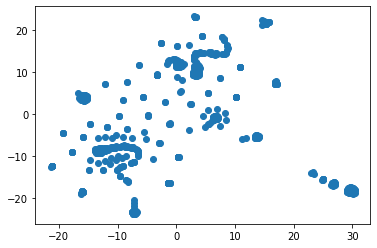

In [136]:
#This appears to show three groups based on visualization.

plt.scatter(crypto3_df_pca['x'], crypto3_df_pca['y'])
plt.show()

In [137]:
#I believe this helps determine the where most significant changes in data occur.

inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto3_df_pca)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,213753.558197
1,2,135044.746939
2,3,82661.636613
3,4,71580.586454
4,5,62418.897813


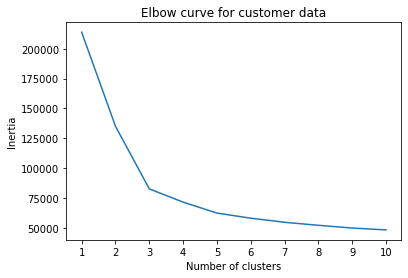

In [138]:
#This looks like the biggest contrast happens at three and four.

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

In [139]:
#This creates a function that takes in the number of clusters I want and the dataframe split the data up from

def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [140]:
#This saves the function, allowing the user to enter "3" clusters/groups to be identified in the crytpo3_df_pca dataframe.

clusters = get_clusters(3, crypto3_df_pca)

In [141]:
clusters

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,...,principal component 62,principal component 63,principal component 64,principal component 65,principal component 66,principal component 67,principal component 68,x,y,class
0,-0.294749,0.221724,-0.314632,-0.002830,-0.068940,-0.181785,0.108579,-0.220355,0.005807,-0.057541,...,1.946865e-15,1.505681e-15,-2.835272e-17,1.132280e-15,3.839177e-15,-9.539702e-16,7.912375e-16,3.124569,9.110776,0
1,-0.278888,0.228553,-0.312491,-0.002766,-0.067183,-0.179823,0.107466,-0.221187,0.006759,-0.055993,...,1.888173e-15,1.262876e-15,-4.932516e-16,8.694182e-16,3.807667e-15,-1.077407e-15,1.347164e-15,8.163554,14.344601,0
2,2.313053,1.005164,-0.082370,-0.007673,0.140575,-0.022063,-0.313947,-0.343038,-0.088499,0.697268,...,3.641590e-14,3.113009e-14,6.848452e-14,7.033556e-14,-5.906268e-14,1.127804e-13,-4.057285e-14,14.660370,22.437092,0
3,-0.443663,0.586449,0.246816,0.004023,0.117112,-0.083445,-0.055098,0.006290,-0.211137,-0.100055,...,1.153446e-14,-8.979118e-16,1.244483e-14,1.540355e-14,6.074702e-15,1.846060e-14,-1.149958e-15,30.084391,-17.442232,2
4,-0.535977,0.847064,0.495451,0.007292,0.207879,0.085183,-0.053408,0.039171,-0.135224,-0.224842,...,4.049092e-14,1.319135e-13,1.064864e-13,1.489654e-14,5.613300e-14,1.372442e-13,-2.213567e-13,-21.168821,-12.382480,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,2.924852,-2.833846,-1.938148,-0.023653,-0.541496,-1.675099,0.438136,0.592805,-0.855680,-1.045080,...,1.431297e-14,5.509529e-15,1.625412e-14,1.435417e-14,6.402893e-15,2.239416e-14,-2.183355e-15,23.539429,-14.075047,2
529,-0.292915,0.222641,-0.314290,-0.002832,-0.068704,-0.181519,0.108432,-0.220475,0.005919,-0.057347,...,2.261367e-15,1.379052e-15,3.174565e-17,1.169707e-15,3.486204e-15,-5.690838e-16,8.350297e-16,4.061549,14.500987,0
530,-0.148036,1.358480,0.714154,0.009117,0.349144,0.230424,-0.151453,-0.018625,-0.106917,-0.165319,...,4.329875e-14,5.075446e-15,4.582509e-14,3.710122e-14,9.211202e-13,4.946823e-14,-2.957758e-15,-7.462119,-23.193981,1
531,-0.518918,0.809278,0.506884,0.007340,0.206928,0.115981,-0.044744,0.046282,-0.103029,-0.227188,...,1.010860e-13,6.422968e-14,3.768787e-14,3.666009e-14,6.928170e-14,8.532423e-15,2.187238e-14,-16.047440,-18.318949,1


In [142]:
crypto4.reset_index()
clusters['CoinCode'] = crypto4['CoinName']
clusters = clusters[['CoinCode','principal component 1', 'principal component 2',
       'principal component 3', 'principal component 4',
       'principal component 5', 'principal component 6',
       'principal component 7', 'principal component 8',
       'principal component 9', 'principal component 10',
       'principal component 11', 'principal component 12', 'x', 'y', 'class']]
clusters.head()

,CoinCode,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,x,y,class
0,42 Coin,-0.294749,0.221724,-0.314632,-0.002830,-0.068940,-0.181785,0.108579,-0.220355,0.005807,-0.057541,-0.693329,-1.554697,3.124569,9.110776,0
1,365Coin,-0.278888,0.228553,-0.312491,-0.002766,-0.067183,-0.179823,0.107466,-0.221187,0.006759,-0.055993,-0.696118,-1.554313,8.163554,14.344601,0
2,404Coin,2.313053,1.005164,-0.082370,-0.007673,0.140575,-0.022063,-0.313947,-0.343038,-0.088499,0.697268,-1.505580,0.786120,14.660370,22.437092,0
3,SixEleven,-0.443663,0.586449,0.246816,0.004023,0.117112,-0.083445,-0.055098,0.006290,-0.211137,-0.100055,0.805709,0.906607,30.084391,-17.442232,2
4,808,-0.535977,0.847064,0.495451,0.007292,0.207879,0.085183,-0.053408,0.039171,-0.135224,-0.224842,1.297218,0.772845,-21.168821,-12.382480,1


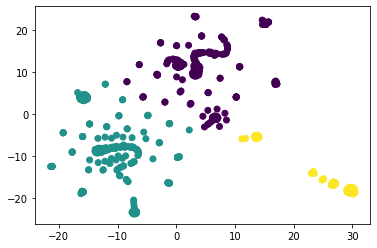

In [143]:
def show_clusters(df):
    plt.scatter(crypto3_df_pca['x'], crypto3_df_pca['y'], c=crypto3_df_pca['class'])
    plt.show()
show_clusters(clusters)

In [ ]:
#Based on these findings, there appears to be 3 signficant clusters with sizable separation. 
#The data supports that these crypto currencies can be clustered together best with 3 or possibly 4 different classes based on the data provided. 